# Creating visualization for income_group

## Importing libraries

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Creating path for folder

In [8]:
path = r'/Users/ceciliamoura/Desktop/Career Foundry/Achievement4/Instacart Basket Analysis'

## Importing files

In [11]:
# Importing subset with only high activity customers

In [13]:
instacart = pd.read_pickle(os.path.join (path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))

In [16]:
instacart.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_day_of_week', 'order_time',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'max_order', 'max_order_per_user',
       'products_per_order', 'order_cost', 'Region', 'age_group',
       'loyalty_flag', 'mean_order_cost_per_user', 'spending_flag',
       'income_group'],
      dtype='object')

In [18]:
instacart.shape

(30963518, 30)

## 1. Creating a subset with columns of interest

In [15]:
# Creating a subset with unique entries for each user_id

income_groups = instacart[['income_group', 'user_id', 'Region', 'mean_order_cost_per_user', 'spending_flag', 'products_per_order', 'order_cost']]

In [17]:
income_groups.shape

(30963518, 7)

In [19]:
# Creating a subset withou duplicates

income_groups_nodups = income_groups.drop_duplicates()

In [21]:
income_groups_nodups.shape

(2958921, 7)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

/var/folders/30/j2w0rj9n75x1by3sr86s740h0000gn/T/ipykernel_11938/3364611831.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='income_group', y='count', hue='spending_flag', data=income_groups_nodups.groupby(['income_group', 'spending_flag']).size().reset_index(name='count'))


<Axes: xlabel='income_group', ylabel='count'>

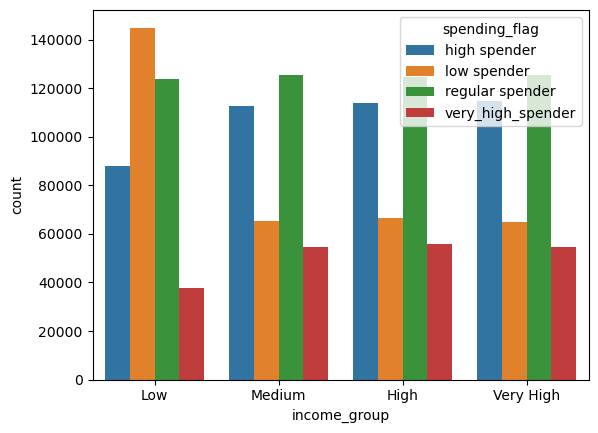

In [35]:
# Stacked bar chart

sns.barplot(x='income_group', y='count', hue='spending_flag', data=income_groups_nodups.groupby(['income_group', 'spending_flag']).size().reset_index(name='count'))

In [37]:
income_groups_nodups.columns

Index(['income_group', 'user_id', 'Region', 'mean_order_cost_per_user',
       'spending_flag', 'products_per_order'],
      dtype='object')

In [39]:
#Performing Multiple Agregations 

income_groups_nodups.groupby('income_group').agg({'products_per_order': ['mean', 'min', 'max']})


/var/folders/30/j2w0rj9n75x1by3sr86s740h0000gn/T/ipykernel_11938/2043975544.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_groups_nodups.groupby('income_group').agg({'products_per_order': ['mean', 'min', 'max']})


products_per_order         
                           mean min  max
income_group                            
Low                   10.850600   1  137
Medium                12.301023   1  113
High                  12.285158   1  145
Very High             12.302865   1  121

In [49]:
#Performing Multiple Agregations 

income_groups_nodups.groupby('income_group').agg({'order_cost': ['mean', 'min', 'max']})

/var/folders/30/j2w0rj9n75x1by3sr86s740h0000gn/T/ipykernel_11938/673100175.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_groups_nodups.groupby('income_group').agg({'order_cost': ['mean', 'min', 'max']})


order_cost             
                   mean  min     max
income_group                        
Low           68.176515  1.0   875.0
Medium        85.485857  0.0   852.5
High          85.390950  0.0  1092.2
Very High     85.353785  0.0  1047.4

## People from low income group buy less expensive products, not less products compared to people from other income groups. 

In [51]:
#Performing Multiple Agregations 

income_groups_nodups.groupby('spending_flag').agg({'order_cost': ['mean', 'min', 'max']})

order_cost             
                         mean  min     max
spending_flag                             
high spender       107.886318  0.0   656.5
low spender         37.697934  0.0   266.9
regular spender     70.968749  0.0   413.4
very_high_spender  168.212883  0.0  1092.2

## 6. Creating a stacked bar chart showing spending flag by income group

/var/folders/30/j2w0rj9n75x1by3sr86s740h0000gn/T/ipykernel_65896/730028019.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='income_group', y='count', hue='spending_flag', data=income_groups_nodups.groupby(['income_group', 'spending_flag']).size().reset_index(name='count'))


Text(0.5, 1.0, 'Customer Spending Status by Income Group')

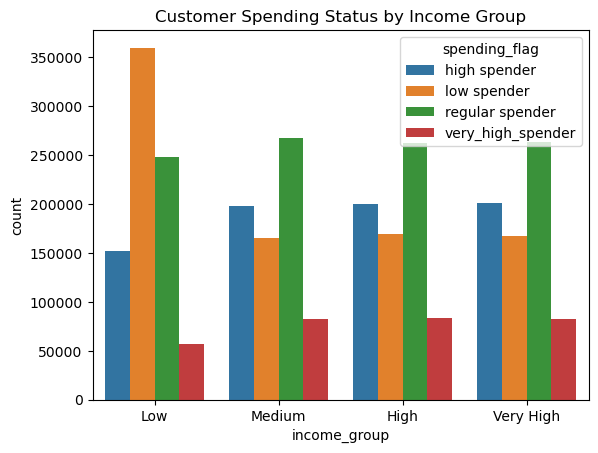

In [24]:
# Stacked bar chart

sns.barplot(x='income_group', y='count', hue='spending_flag', data=income_groups_nodups.groupby(['income_group', 'spending_flag']).size().reset_index(name='count'))
plt.title("Customer Spending Status by Income Group")